@author: spe

This example covers calculating the forces in both typeII and type-I,
three-dimensional MOT in a variety of different ways and comparing the various
results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
import pylcp
import pylcp.tools
#plt.style.use('paper')

First, can we reproduce all the main figures from  paper?

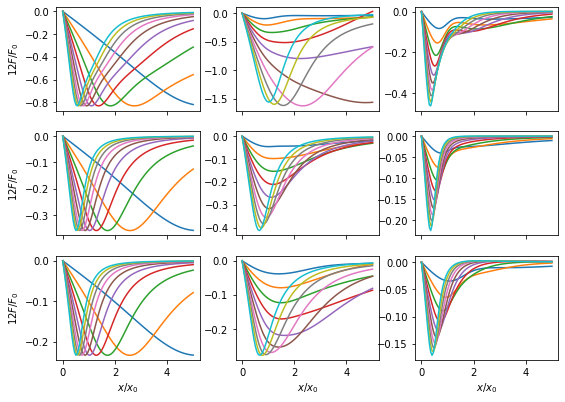

In [2]:
det = -1.0
beta = 1.0

# Make a z-axis
z = np.linspace(1e-10, 5, 100)

# Make the figure
fig, ax = plt.subplots(3, 3,figsize=(9, 6.5))

# Define the lasers:
laserBeams = pylcp.tools.standard_six_beam_MOT(beta, det)

gl = np.array([0., 1., -1.])
gu = np.arange(0.1, 1.1, 0.1)
for ii, gl_i in enumerate(gl):
    for gu_i in gu:
        # Case 1: F=1 -> F=2
        Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=gl_i, muB=1)
        He, Beq = pylcp.hamiltonians.singleF(F=2, gF=gu_i, muB=1)

        dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 2)

        hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

        trap = pylcp.trap_rateeq(laserBeams,
                                 lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                                 hamiltonian, svd_eps=1e-10, include_mag_forces=False)
        trap.generate_force_profile(
            [np.zeros(z.shape), np.zeros(z.shape), z],
            [np.zeros(z.shape), np.zeros(z.shape), np.zeros(z.shape)],
            name='Fz')
        Fz = trap.profile['Fz'].F[2]

        ax[0, ii].plot(z, 12*Fz)
        ax[0, ii].xaxis.set_ticklabels([])

        # Case 2: F=1 -> F=1
        Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=gl_i, muB=1)
        He, Beq = pylcp.hamiltonians.singleF(F=1, gF=2*gu_i, muB=1)

        dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 1)

        hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

        trap = pylcp.trap_rateeq(laserBeams,
                                 lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                                 hamiltonian, svd_eps=1e-10, include_mag_forces=False)
        trap.generate_force_profile(
            [np.zeros(z.shape), np.zeros(z.shape), z],
            [np.zeros(z.shape), np.zeros(z.shape), np.zeros(z.shape)],
            name='Fz')
        Fz = trap.profile['Fz'].F[2]

        ax[1, ii].plot(z, 12*Fz)
        ax[1, ii].xaxis.set_ticklabels([])

        # Case 3: F=2 -> F=1
        Hg, Bgq = pylcp.hamiltonians.singleF(F=2, gF=-0.5*gl_i, muB=1)
        He, Beq = pylcp.hamiltonians.singleF(F=1, gF=-2*gu_i, muB=1)

        dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(2, 1)

        hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

        trap = pylcp.trap_rateeq(laserBeams,
                                 lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                                 hamiltonian, svd_eps=1e-10, include_mag_forces=False)
        trap.generate_force_profile(
            [np.zeros(z.shape), np.zeros(z.shape), z],
            [np.zeros(z.shape), np.zeros(z.shape), np.zeros(z.shape)],
            name='Fz')
        Fz = trap.profile['Fz'].F[2]

        ax[2, ii].plot(z, 12*Fz)
        ax[2, ii].set_xlabel('$x/x_0$')

for ii in range(3):
    ax[ii, 0].set_ylabel('$12F/F_0$')
fig.subplots_adjust(wspace=0.25)
# fig.savefig('/Users/spe/Desktop/tarbutt_comparison.pdf')

Now, with the added atomic structure, let's look at the force in phase space:

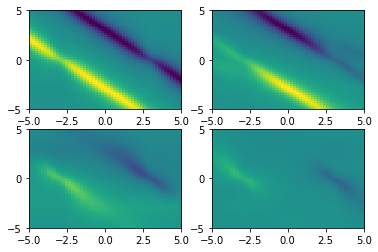

In [3]:
x = np.arange(-5, 5.1, 0.2)
v = np.arange(-5, 5.1, 0.2)

X, V = np.meshgrid(x, v)

det = -3.0
alpha = 1.0
beta = 2.0

laserBeams = pylcp.tools.standard_six_beam_MOT(beta, det)

# Define the atomic Hamiltonian for F-> 0 to 1:
Hg, Bgq = pylcp.hamiltonians.singleF(F=0, gF=0, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=1, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(0, 1)

hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

trap = pylcp.trap_rateeq(laserBeams,
                         lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                         hamiltonian, svd_eps=1e-10, include_mag_forces=False)
trap.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
Fz0to1 = trap.profile['Fz'].F[2]

#  Plot it up
fig, ax = plt.subplots(2, 2, num="Comparison of F_z")
ax[0, 0].imshow(Fz0to1, extent=(np.amin(X[0, :]), np.amax(X[0, :]),
                                np.amin(V[:, 0]), np.amax(V[:, 0])),
                origin='bottom', aspect='auto', vmin=-0.3, vmax=0.3)

# Define the atomic Hamiltonian for F-> 1 to 2:
Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=2, gF=1/2, muB=1)

dijq =  pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 2)

hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

trap = pylcp.trap_rateeq(laserBeams,
                         lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                         hamiltonian, svd_eps=1e-10, include_mag_forces=False)
trap.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
Fz1to2 = trap.profile['Fz'].F[2]

# Add it to the plot:
ax[0, 1].imshow(Fz1to2, extent=(np.amin(X[0, :]), np.amax(X[0, :]),
                                np.amin(V[:, 0]), np.amax(V[:, 0])),
                origin='bottom', aspect='auto', vmin=-0.3, vmax=0.3)

# Define the atomic Hamiltonian F = 1 -> 1:
Hg, Bgq = pylcp.hamiltonians.singleF(F=1, gF=0, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=1, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(1, 1)

hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

trap = pylcp.trap_rateeq(laserBeams,
                         lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                         hamiltonian, svd_eps=1e-10, include_mag_forces=False)
trap.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
Fz1to1 = trap.profile['Fz'].F[2]

ax[1, 0].imshow(Fz1to1, extent=(np.amin(X[0, :]), np.amax(X[0, :]),
                                np.amin(V[:, 0]), np.amax(V[:, 0])),
                origin='bottom', aspect='auto', vmin=-0.1, vmax=0.1)

# Define the atomic Hamiltonian F = 2 -> 1:
Hg, Bgq = pylcp.hamiltonians.singleF(F=2, gF=0, muB=1)
He, Beq = pylcp.hamiltonians.singleF(F=1, gF=-1, muB=1)

dijq = pylcp.hamiltonians.dqij_two_bare_hyperfine(2, 1)

hamiltonian = pylcp.hamiltonian(Hg, He, Bgq, Beq, dijq)

trap = pylcp.trap_rateeq(laserBeams,
                         lambda R: pylcp.tools.quadrupoleField3D(R, 1),
                         hamiltonian, svd_eps=1e-10, include_mag_forces=False)
trap.generate_force_profile(
    [np.zeros(X.shape), np.zeros(X.shape), X],
    [np.zeros(V.shape), np.zeros(V.shape), V],
    name='Fz')
Fz2to1 = trap.profile['Fz'].F[2]

ax[1, 1].imshow(Fz2to1, extent=(np.amin(X[0, :]), np.amax(X[0, :]),
                                np.amin(V[:, 0]), np.amax(V[:, 0])),
                origin='bottom', aspect='auto', vmin=-0.1, vmax=0.1)